<a href="https://colab.research.google.com/github/Sushilchankapure/Sushilchankapure/blob/main/Crop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv("Crop Price Prediction.csv")

In [32]:
df.head()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10


In [33]:
df.tail()

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
44,Tamil Nadu,SUGARCANE,66335.06,66336.06,85.79,1015.45,28.97,2422.2,132671.12
45,Madhya Pradesh,WHEAT,12464.40,12465.40,810.25,23.59,29.37,3275.1,24929.80
46,Punjab,WHEAT,17945.58,17946.58,804.80,39.83,28.84,3079.9,35892.16
47,Uttar Pradesh,WHEAT,18979.38,18980.38,769.84,34.99,28.73,2721.9,37959.76
48,Rajasthan,WHEAT,19119.08,19120.08,683.58,37.19,28.89,3449.0,38239.16


In [34]:
df.shape

(49, 9)

In [35]:
df.columns

Index(['State', 'Crop', 'CostCultivation', 'CostCultivation2', 'Production',
       'Yield', 'Temperature', 'RainFall Annual', 'Price'],
      dtype='object')

In [36]:
df.duplicated().sum()

0

In [37]:
df.isnull().sum()

State               0
Crop                0
CostCultivation     0
CostCultivation2    0
Production          0
Yield               0
Temperature         0
RainFall Annual     0
Price               0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             49 non-null     object 
 1   Crop              49 non-null     object 
 2   CostCultivation   49 non-null     float64
 3   CostCultivation2  49 non-null     float64
 4   Production        49 non-null     float64
 5   Yield             49 non-null     float64
 6   Temperature       49 non-null     float64
 7   RainFall Annual   49 non-null     float64
 8   Price             49 non-null     float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


In [39]:
df.describe()

,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,20363.537347,20364.643469,1620.537755,98.086735,28.780612,2951.740816,40728.074694
std,13561.435306,13561.350894,1104.990472,245.293123,0.246555,373.964966,27122.870613
min,5483.540000,5484.540000,85.790000,1.320000,28.110000,2352.100000,10968.080000
25%,12774.410000,12775.410000,732.620000,9.590000,28.660000,2687.200000,25549.820000
50%,17022.000000,17023.000000,1595.560000,13.700000,28.760000,2957.800000,34045.000000
75%,24731.060000,24732.060000,2228.970000,36.610000,28.890000,3264.400000,49463.120000
max,66335.060000,66336.060000,5777.480000,1015.450000,29.460000,3722.800000,132671.120000


In [40]:
df.nunique()

State               13
Crop                10
CostCultivation     49
CostCultivation2    49
Production          49
Yield               49
Temperature         35
RainFall Annual     43
Price               49
dtype: int64

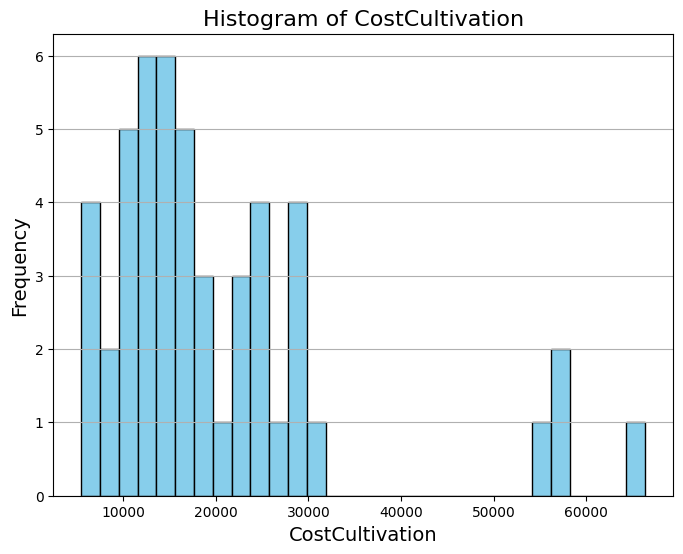

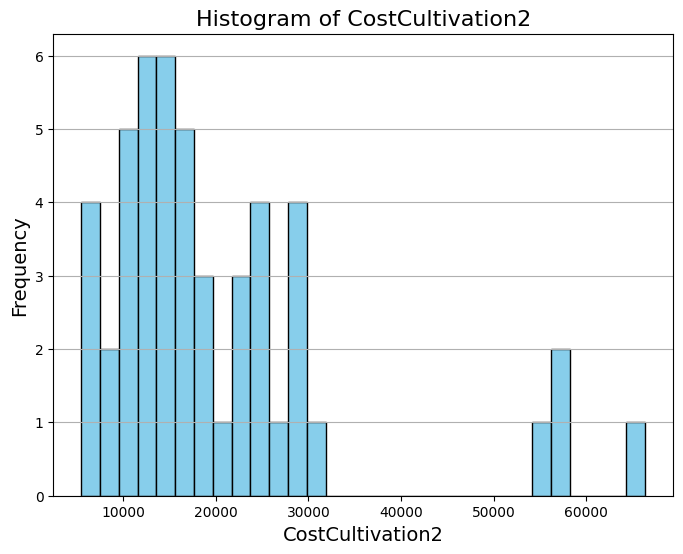

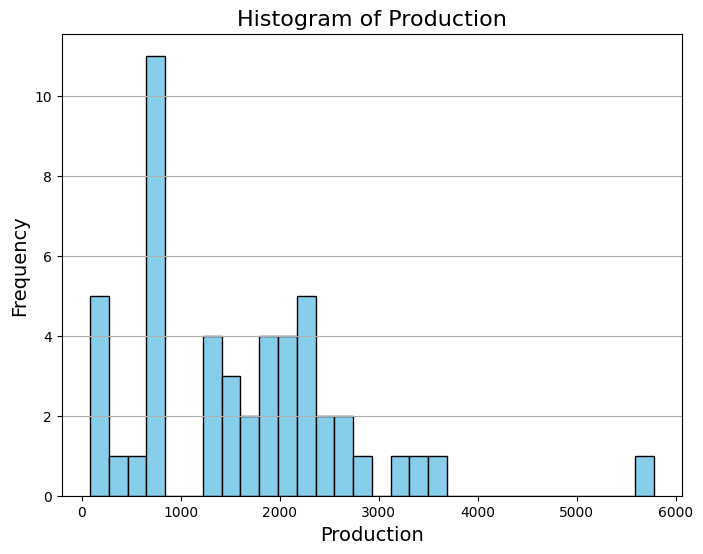

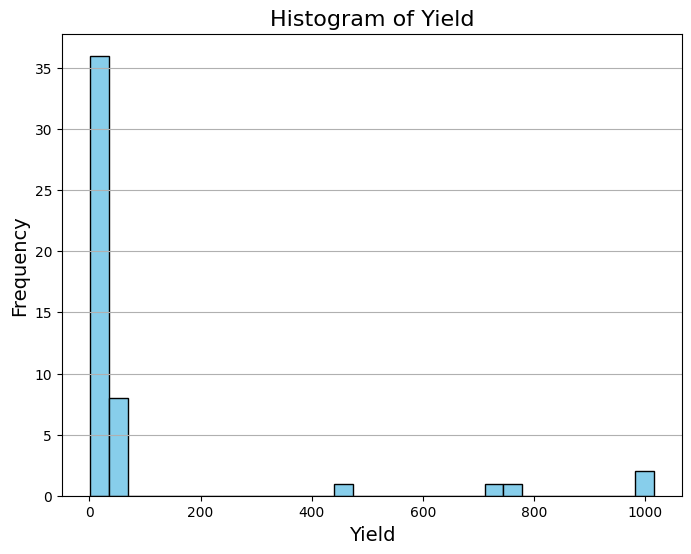

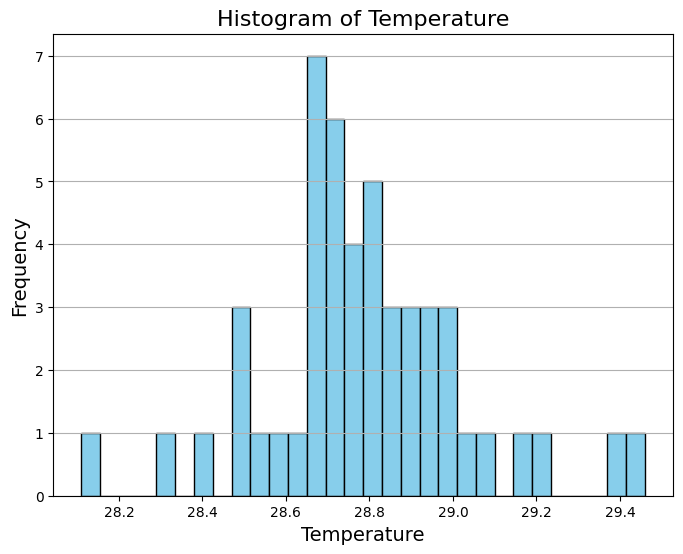

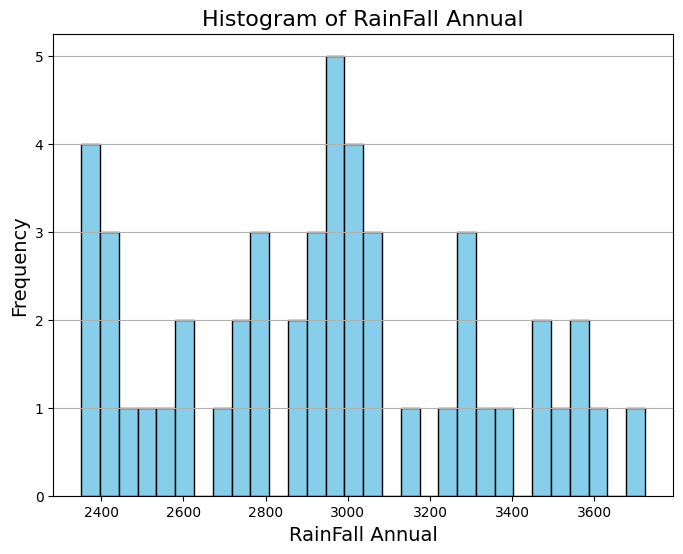

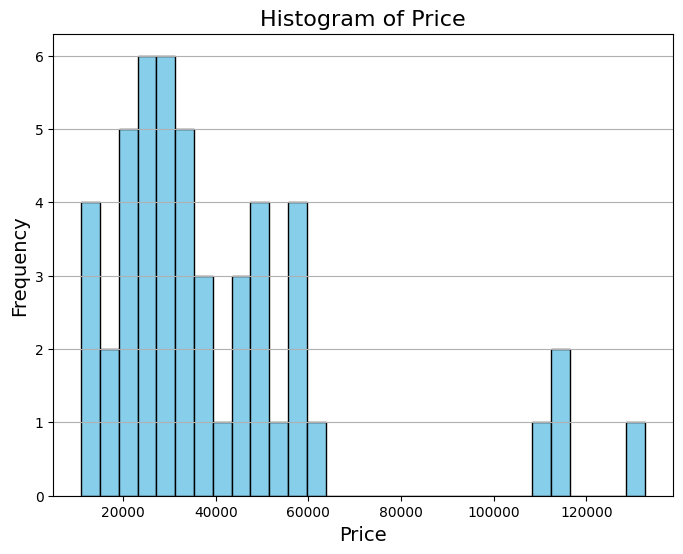

In [41]:
columns_of_interest = ['CostCultivation','CostCultivation2','Production','Yield','Temperature','RainFall Annual','Price']
for column in columns_of_interest:
  plt.figure(figsize=(8,6))
  plt.hist(df[column], bins=30,color='skyblue',edgecolor='black')
  plt.title(f'Histogram of {column}',fontsize=16)
  plt.xlabel(column, fontsize=14)
  plt.ylabel('Frequency',fontsize=14)
  plt.grid(axis='y')
  plt.show()

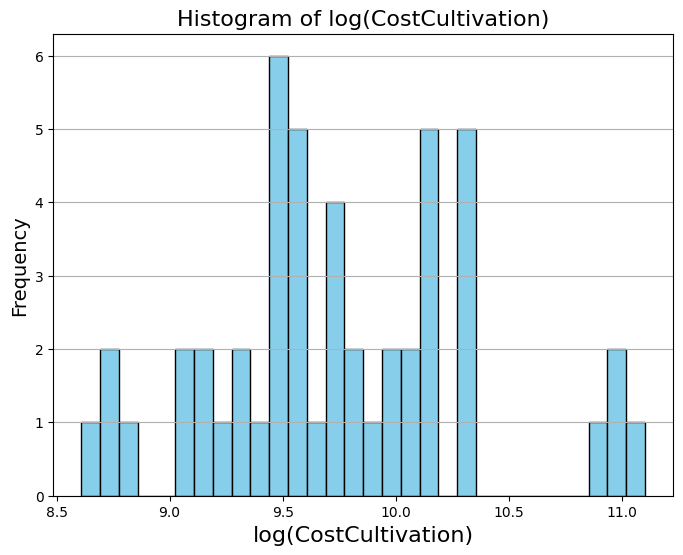

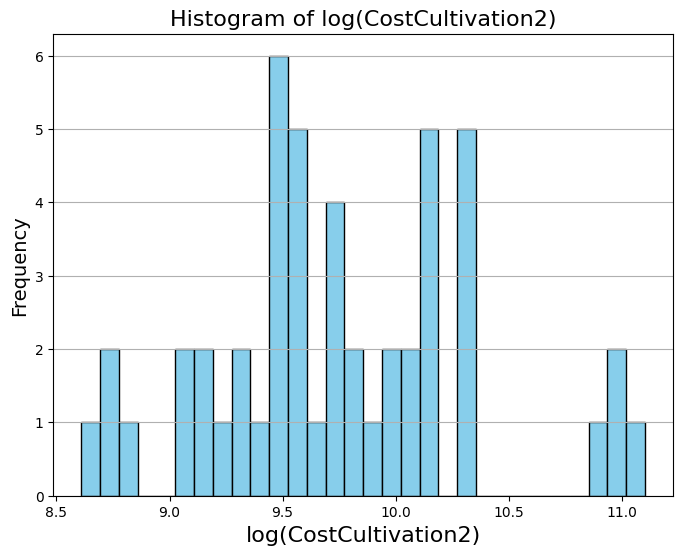

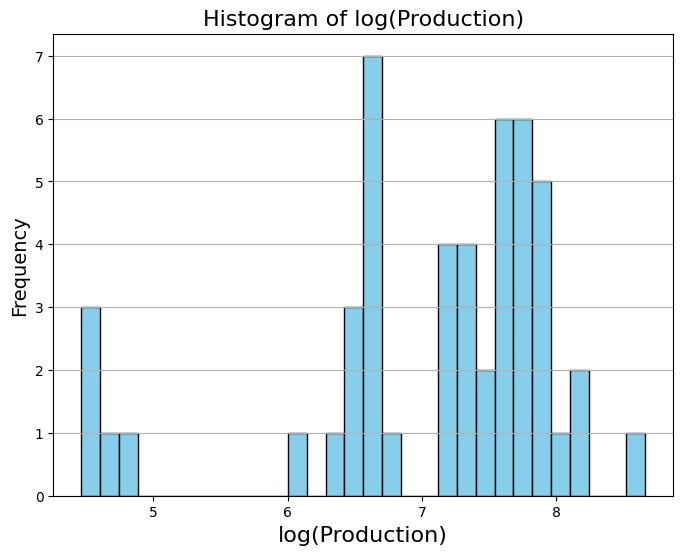

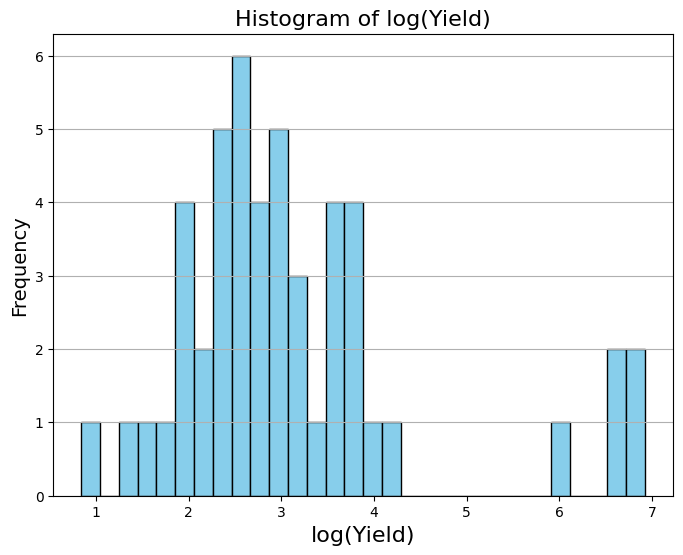

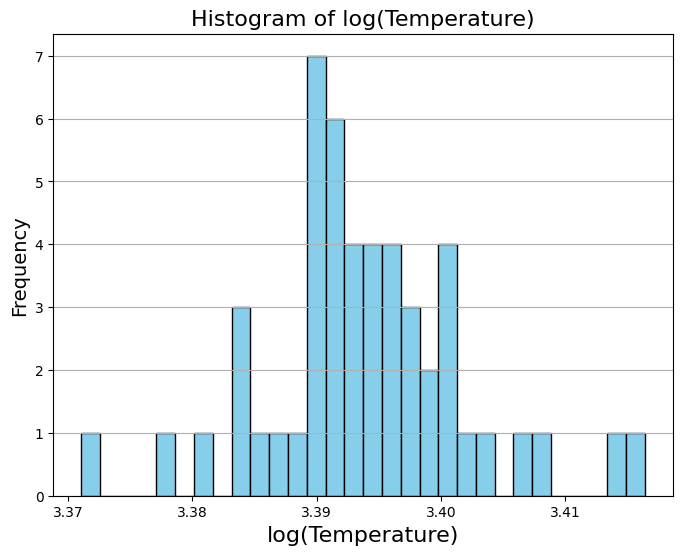

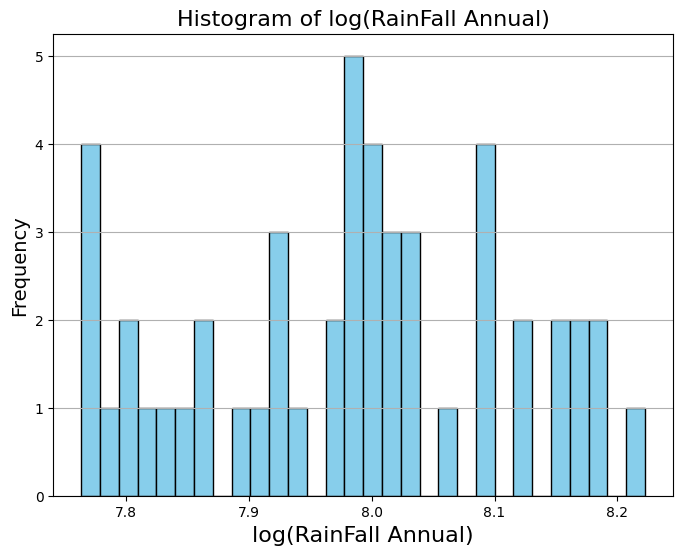

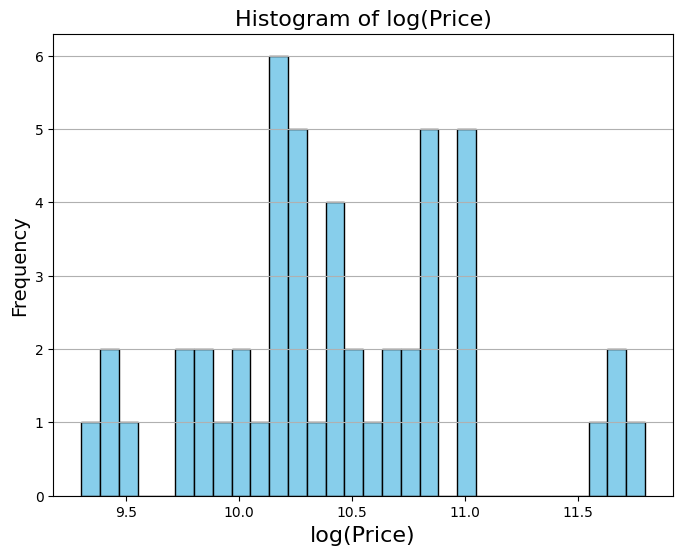

In [44]:
for column in columns_of_interest:
  df[column+' _log'] = np.log(df[column] + 1)

for column in columns_of_interest:
  plt.figure(figsize=(8,6))
  plt.hist(df[column+' _log'], bins=30, color='skyblue', edgecolor='black')
  plt.title(f'Histogram of log({column})', fontsize=16)
  plt.xlabel(f'log({column})', fontsize=16)
  plt.ylabel('Frequency',fontsize=14)
  plt.grid(axis='y')
  plt.show()

In [45]:
df

,State,Crop,CostCultivation,CostCultivation2,Production,Yield,Temperature,RainFall Annual,Price,CostCultivation _log,CostCultivation2 _log,Production _log,Yield _log,Temperature _log,RainFall Annual _log,Price _log
0,Uttar Pradesh,ARHAR,9794.05,9800.25,1941.55,9.83,28.96,3373.2,19589.10,9.189632,9.190265,7.571757,2.382320,3.399863,8.123914,9.882780
1,Karnataka,ARHAR,10593.15,10594.15,2172.46,7.47,29.22,3520.7,21187.30,9.268057,9.268152,7.684076,2.136531,3.408504,8.166699,9.961204
2,Gujarat,ARHAR,13468.82,13469.82,1898.30,9.59,28.47,2957.4,26938.64,9.508207,9.508281,7.549241,2.359910,3.383373,7.992404,10.201354
3,Andhra Pradesh,ARHAR,17051.66,17052.66,3670.54,6.42,28.49,3079.6,34104.32,9.744061,9.744120,8.208366,2.004179,3.384051,8.032880,10.437209
4,Maharashtra,ARHAR,17130.55,17131.55,2775.80,8.72,28.30,2566.7,34262.10,9.748677,9.748735,7.929054,2.274186,3.377588,7.850766,10.441824
5,Maharashtra,COTTON,23711.44,23712.44,2539.47,12.69,28.73,2534.4,47423.88,10.073755,10.073797,7.840104,2.616666,3.392157,7.838107,10.766902
6,Punjab,COTTON,29047.10,29048.10,2003.76,24.39,28.65,3347.9,58095.20,10.276708,10.276743,7.603280,3.234355,3.389462,8.116387,10.969856
7,Andhra Pradesh,COTTON,29140.77,29141.77,2509.99,17.83,28.83,3576.4,58282.54,10.279928,10.279962,7.828432,2.935451,3.395515,8.182392,10.973075
8,Gujarat,COTTON,29616.09,29617.09,2179.26,19.05,28.38,2899.4,59233.18,10.296107,10.296141,7.687199,2.998229,3.380314,7.972604,10.989254
9,Haryana,COTTON,29918.97,29919.97,2127.35,19.90,28.53,2687.2,59838.94,10.306281,10.306315,7.663102,3.039749,3.385407,7.896627,10.999429


In [46]:
df = df.drop(columns=columns_of_interest)

In [47]:
df

,State,Crop,CostCultivation _log,CostCultivation2 _log,Production _log,Yield _log,Temperature _log,RainFall Annual _log,Price _log
0,Uttar Pradesh,ARHAR,9.189632,9.190265,7.571757,2.382320,3.399863,8.123914,9.882780
1,Karnataka,ARHAR,9.268057,9.268152,7.684076,2.136531,3.408504,8.166699,9.961204
2,Gujarat,ARHAR,9.508207,9.508281,7.549241,2.359910,3.383373,7.992404,10.201354
3,Andhra Pradesh,ARHAR,9.744061,9.744120,8.208366,2.004179,3.384051,8.032880,10.437209
4,Maharashtra,ARHAR,9.748677,9.748735,7.929054,2.274186,3.377588,7.850766,10.441824
5,Maharashtra,COTTON,10.073755,10.073797,7.840104,2.616666,3.392157,7.838107,10.766902
6,Punjab,COTTON,10.276708,10.276743,7.603280,3.234355,3.389462,8.116387,10.969856
7,Andhra Pradesh,COTTON,10.279928,10.279962,7.828432,2.935451,3.395515,8.182392,10.973075
8,Gujarat,COTTON,10.296107,10.296141,7.687199,2.998229,3.380314,7.972604,10.989254
9,Haryana,COTTON,10.306281,10.306315,7.663102,3.039749,3.385407,7.896627,10.999429


In [48]:
df = pd.get_dummies(df, columns=['State','Crop'])

In [49]:
df

,CostCultivation _log,CostCultivation2 _log,Production _log,Yield _log,Temperature _log,RainFall Annual _log,Price _log,State_Andhra Pradesh,State_Bihar,State_Gujarat,...,Crop_ MUSTARD,Crop_ARHAR,Crop_COTTON,Crop_GRAM,Crop_GROUNDNUT,Crop_MAIZE,Crop_MOONG,Crop_PADDY,Crop_SUGARCANE,Crop_WHEAT
0,9.189632,9.190265,7.571757,2.382320,3.399863,8.123914,9.882780,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,9.268057,9.268152,7.684076,2.136531,3.408504,8.166699,9.961204,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,9.508207,9.508281,7.549241,2.359910,3.383373,7.992404,10.201354,False,False,True,...,False,True,False,False,False,False,False,False,False,False
3,9.744061,9.744120,8.208366,2.004179,3.384051,8.032880,10.437209,True,False,False,...,False,True,False,False,False,False,False,False,False,False
4,9.748677,9.748735,7.929054,2.274186,3.377588,7.850766,10.441824,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,10.073755,10.073797,7.840104,2.616666,3.392157,7.838107,10.766902,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6,10.276708,10.276743,7.603280,3.234355,3.389462,8.116387,10.969856,False,False,False,...,False,False,True,False,False,False,False,False,False,False
7,10.279928,10.279962,7.828432,2.935451,3.395515,8.182392,10.973075,True,False,False,...,False,False,True,False,False,False,False,False,False,False
8,10.296107,10.296141,7.687199,2.998229,3.380314,7.972604,10.989254,False,False,True,...,False,False,True,False,False,False,False,False,False,False
9,10.306281,10.306315,7.663102,3.039749,3.385407,7.896627,10.999429,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [58]:
# @title Default title text
# Assuming df is your DataFrame and it has been previously defined
X = df.drop(columns=['Price _log'])
y = df['Price _log']
# spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print('Linear Regression - Mean Squared Error:', mse_lr)
print('Linear Regression - R^2 Score:' , r2_lr)



Linear Regression - Mean Squared Error: 1.0286746204081994e-28
Linear Regression - R^2 Score: 1.0


In [60]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print('Decision Tree Regressor - Mean Squared Error:', mse_dt)
print('Decision Tree Regressor - R^2 Score:', r2_dt)

Decision Tree Regressor - Mean Squared Error: 0.007088115172524581
Decision Tree Regressor - R^2 Score: 0.9866646003893208


In [62]:
# Support Vector Regression
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print('Support Vector Regression - Mean Squared Error:', mse_svr)
print('Support Vector Regression - R^2 Score:', r2_svr)

Support Vector Regression - Mean Squared Error: 0.17974104293459914
Support Vector Regression - R^2 Score: 0.6618397732497046


In [63]:
# Random Forest Regressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest Regressor - Mean Squared Error:', mse_rf)
print('Random Forest Regressor - R^2 Score:', r2_rf)

Random Forest Regressor - Mean Squared Error: 0.028304775254894627
Random Forest Regressor - R^2 Score: 0.9467481157222726


In [64]:
# XGBoost Regressor
model_xgb = XGBRegressor(random_state=42)
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print('XGBoost Regressor - Mean Squared Error:', mse_xgb)
print('XGBoost Regressor - R^2 Score:', r2_xgb)

XGBoost Regressor - Mean Squared Error: 0.008254704072826479
XGBoost Regressor - R^2 Score: 0.9844698097026215


In [65]:
import matplotlib.pyplot as plt
import  pandas as pd

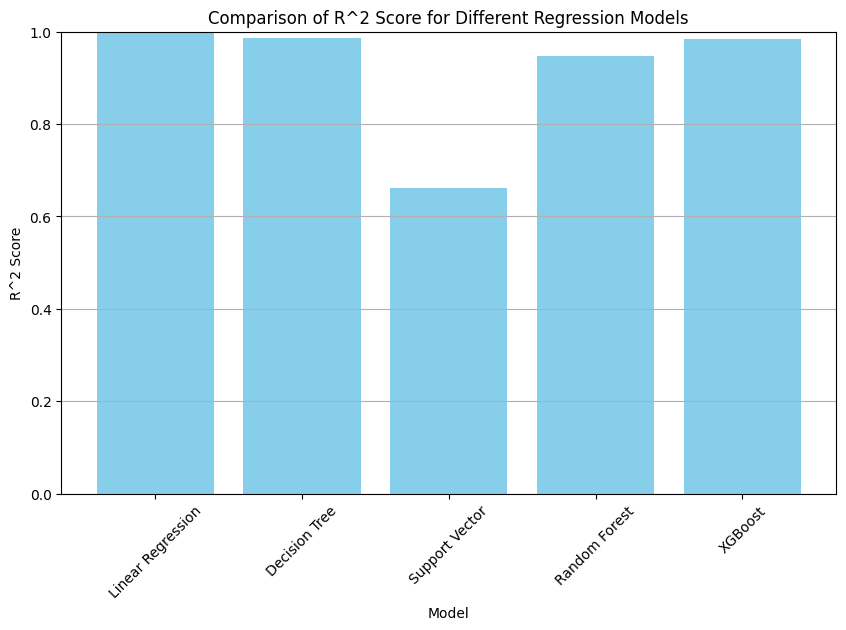

result table:
               Model  R^2 Score
0  Linear Regression   1.000000
1      Decision Tree   0.986665
2     Support Vector   0.661840
3      Random Forest   0.946748
4            XGBoost   0.984470


In [67]:
# storing the result in a DataFrame
result = pd.DataFrame({
    'Model' : ['Linear Regression', 'Decision Tree','Support Vector','Random Forest','XGBoost'],
    'R^2 Score' : [r2_lr, r2_dt,r2_svr, r2_rf, r2_xgb]
    })

# plotting a bar graph
plt.figure(figsize=(10,6))
plt.bar(result['Model'], result['R^2 Score'],color=['skyblue'])
plt.title('Comparison of R^2 Score for Different Regression Models')
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Display the result table
print("result table:")
print(result)